## Observations and Insights 

Based on the mouse study data that was collected, a few inferences that can be made are:

1.) Most mice were treated with Capomulin for the majority of treatments.

2.) Based on the empirical data, mice treated with Capomulin and Ramicane had smaller tumor sizes  by the last timepoint when compared to the other two drugs tested. 

3.) For Mouse (ID R554), treatment with capomulin was highly effective in reducing the size of the tumor volume over a period of time. 

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mousestudy = pd.merge(study_results,mouse_metadata,how = 'left', on = 'Mouse ID')


# Display the data table for preview

mousestudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [103]:
# Checking the number of mice.
micecount = len(mousestudy["Mouse ID"].unique())
micecount

249

In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

findduplicate = mousestudy.loc[mousestudy.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
findduplicate

array(['g989'], dtype=object)

In [105]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = mousestudy[mousestudy["Mouse ID"] != "g989"]

len(cleandata["Mouse ID"].unique())

cleandata.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

meandrug = mousestudy.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mediandrug = mousestudy.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
varidrug = mousestudy.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddrug = mousestudy.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
semdrug =  mousestudy.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
summarystats = pd.DataFrame ({"Mean": round(meandrug,2),
                             "Median": round(mediandrug,2),
                             "Variance": round(varidrug,2),
                             "Standard Deviation":round(stddrug,2),
                             "SEM": round(semdrug,2)})
summarystats




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function


summarytable = mousestudy.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var",
                                                                             "std","sem"]})
#summarytable.style.format


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Mice')

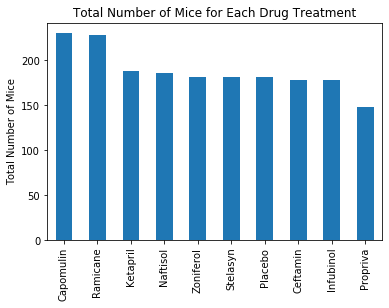

In [124]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
micebar = cleandata["Drug Regimen"].value_counts()
micebar.plot(kind ='bar')
plt.title("Total Number of Mice for Each Drug Treatment")
plt.ylabel("Total Number of Mice")

Text(0, 0.5, 'Total Number of Mice')

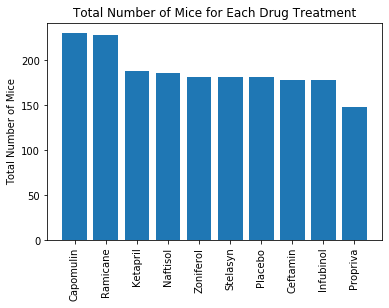

In [125]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_axis = micebar.index.values

yaxis = micebar.values
                   

                
plt.bar(x_axis, yaxis, align="center")
plt.xticks( rotation = "90")
plt.title("Total Number of Mice for Each Drug Treatment")
plt.ylabel("Total Number of Mice")

Text(0.5, 1.0, 'Distribution of Mice by Sex')

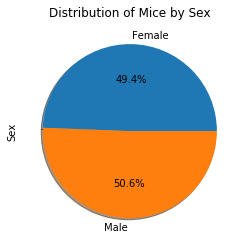

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_type = mousestudy.groupby(["Sex"])
mouse_typecount = mouse_type["Sex"].count()
mouse_typecount.plot(kind = 'pie',autopct="%1.1f%%", shadow = True)
plt.title("Distribution of Mice by Sex")

Text(0.5, 1.0, 'Distribution of Mice by Sex')

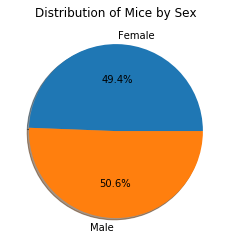

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
plt.pie(mouse_typecount,autopct="%1.1f%%", shadow=True, labels = gender);
plt.title("Distribution of Mice by Sex")

## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

maxtumor = cleandata.groupby(["Mouse ID"]).max()["Timepoint"]
maxtumor = maxtumor.reset_index()
maxtumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mergeddata = maxtumor.merge(cleandata,on = ["Mouse ID","Timepoint"], how = 'left')
mergeddata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [113]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    finaltumorvol = mergeddata.loc[mergeddata["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol.append(finaltumorvol)
    
    # Determine outliers using upper and lower bounds
    quartile = finaltumorvol.quantile([0.25,0.5,0.75])
    lowerq = quartile[0.25]
    upperq = quartile[0.75]
    IQR = upperq - lowerq
    
    lowerbound = lowerq - (1.5 * IQR)
    upperbound = upperq + (1.5 * IQR)
    
    outlier = finaltumorvol.loc[(finaltumorvol < lowerbound) | (finaltumorvol > upperbound)]
    print (f"{drug}: {outlier}")


Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

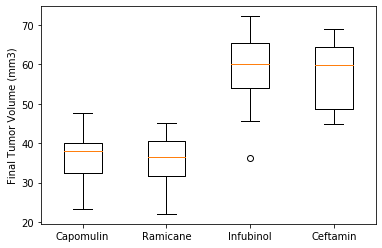

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumorvol,labels=drugs);
plt.ylabel ("Final Tumor Volume (mm3)")


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Over Time \n Mouse R554 Treated with Capomulin ')

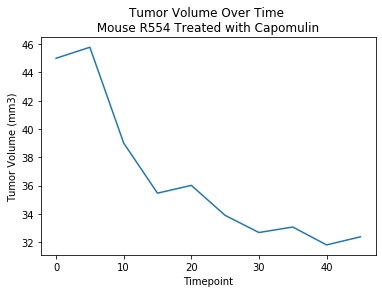

In [115]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_treat_cap = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]
mice_treat_cap 
mouse_cap = mice_treat_cap.loc [mice_treat_cap["Mouse ID"] == "r554"]
timepoints = mouse_cap["Timepoint"]
tumorvol_r554 = mouse_cap["Tumor Volume (mm3)"]

plt.plot(timepoints,tumorvol_r554)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time \n Mouse R554 Treated with Capomulin ")

Text(0.5, 1.0, 'Mouse Weight versus Average Tumor Volume \n For Mice Treated with Capomulin')

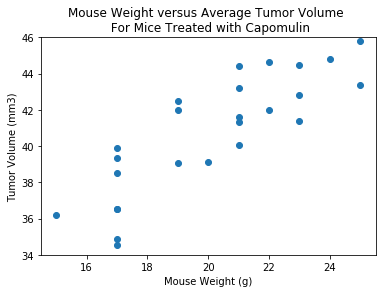

In [300]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_treat_cap 

weight = mice_treat_cap.groupby(["Mouse ID"])["Weight (g)"].unique()

avg_tumorvol = mice_treat_cap.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"] 

plt.scatter(weight,avg_tumorvol)

plt.ylim(34, 46)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight versus Average Tumor Volume \n For Mice Treated with Capomulin")


## Correlation and Regression

The correlation between mouse weight and the average tumor size is 0.525


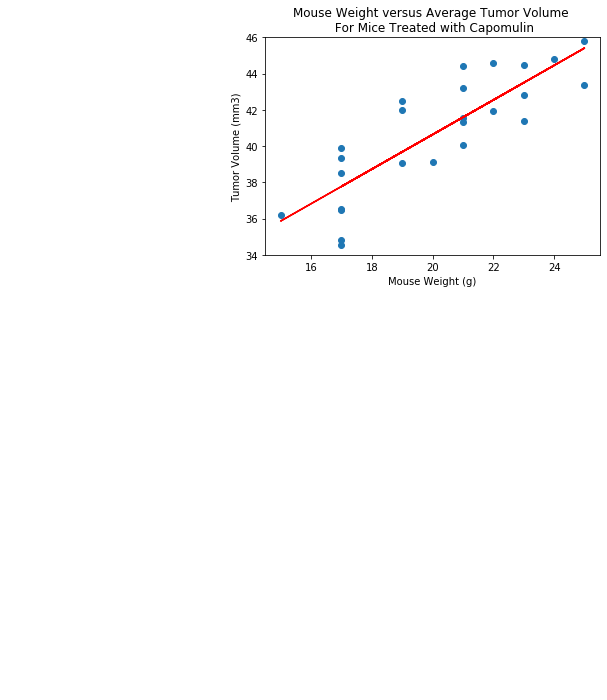

In [299]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_num = mice_treat_cap.groupby(["Mouse ID"]).mean()["Weight (g)"].apply(pd.to_numeric, errors='coerce')

weight_num

m_slope, m_int, m_rvalue, m_pvalue, m_std_err = linregress(weight_num, avg_tumorvol)

regress_values = weight * m_slope + m_int

plt.scatter(weight,avg_tumorvol)

line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))

plt.plot(weight_num,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

mice_corr = mice_treat_cap.corrwith(mice_treat_cap["Weight (g)"])[["Tumor Volume (mm3)"]]

plt.ylim(34, 46)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight versus Average Tumor Volume \n For Mice Treated with Capomulin")

print(f"The correlation between mouse weight and the average tumor size is 0.525" )


